<a href="https://colab.research.google.com/github/salmanhiro/starnet/blob/master/2_Preprocessing_of_Training_Data_%2BEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess training and test set for StarNet
This notebook takes you through the steps of how to pre-process the training data necessary for training StarNet and separate out a high S/N test set.

Requirements:
- python packages: `numpy h5py vos`
* required data files: apStar_visits_main.h5

In [ ]:
import numpy as np
import h5py
import os
#import vos

datadir=""

** If you have not downloaded apStar_visits_main.h5 uncomment the below code to copy the file **

Note: This file requires 38.6GB. It is necessary to download this file to run this particular notebook, although this notebook can be skipped by downloading the files created here seperately. See $1\_Download\_Data.ipynb$ for instructions on how to do so.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
def starnet_download_file(filename):
    vclient = vos.Client()
    vclient.copy('vos:starnet/public/'+filename, datadir+filename)
    print(filename+' downloaded')
    
starnet_download_file('apStar_visits_main.h5')
'''

"\ndef starnet_download_file(filename):\n    vclient = vos.Client()\n    vclient.copy('vos:starnet/public/'+filename, datadir+filename)\n    print(filename+' downloaded')\n    \nstarnet_download_file('apStar_visits_main.h5')\n"

**Load the file that contains individual visit spectra along with APOGEE data associated with each star**

In [ ]:
datadir = ''
filename = datadir + '/content/drive/My Drive/TA/apStar_visits_main.h5'

F = h5py.File(filename,'r')
print('Dataset keys in file: \n')
print(list(F.keys()))

Dataset keys in file: 

['0_FE', '0_FE_ERR', 'ALPHA_M', 'AL_FE', 'AL_FE_ERR', 'CA_FE', 'CA_FE_ERR', 'C_FE', 'C_FE_ERR', 'FE_H', 'FE_H_ERR', 'IDs', 'K_FE', 'K_FE_ERR', 'LOGG', 'LOGG_ERR', 'MG_FE', 'MG_FE_ERR', 'MN_FE', 'MN_FE_ERR', 'NA_FE', 'NA_FE_ERR', 'NI_FE', 'NI_FE_ERR', 'N_FE', 'N_FE_ERR', 'PARAM', 'SI_FE', 'SI_FE_ERR', 'S_FE', 'S_FE_ERR', 'TEFF', 'TEFF_ERR', 'TI_FE', 'TI_FE_ERR', 'VRAD', 'VRAD_ERR', 'VSCATTER', 'V_FE', 'V_FE_ERR', 'aspcap_flag', 'bluegreen_persist', 'error_spectrum', 'greenred_persist', 'num_visits', 'spectrum', 'stacked_snr', 'star_flag', 'star_flag_indiv', 'targ1_flag', 'targ2_flag', 'visit_snr']


** Load the APOGEE data set into memory**

For the training of StarNet, it is only necessary to obtain the spectra and labels, but we need to set restrictions on the training set to obtain the labels of highest validity so we will first include APOGEE_IDs, the spectra, the S/N of the combined spectra, $T_{\mathrm{eff}}$, $\log(g)$,  [Fe/H],  $V_{scatter}$,  STARFLAGs, and ASPCAPFLAGs

In [ ]:
ap_id = F['IDs'][:,0]
combined_snr = F['stacked_snr']
starflag = F['star_flag']
aspcapflag = F['aspcap_flag']
teff = F['TEFF'][:]
logg = F['LOGG'][:]
fe_h = F['FE_H'][:]
vscatter = F['VSCATTER']

print('Obtained data for '+str(len(ap_id))+' individual visits from '+str(len(list(set(list(ap_id)))))+' stars.')

Obtained data for 559484 individual visits from 143467 stars.


In [ ]:
print(len(ap_id))
print(len(combined_snr))
print(len(starflag))
print(len(aspcapflag))
print(len(teff))
print(len(logg))
print(len(fe_h))
print(len(vscatter))

559484
559484
559484
559484
559484
559484
559484
559484


**This is Exploration and Data analysis section, an additional section**

From the apStar visit, we got the every visit data. Some plot for analysis was done for insight purpose using pandas. 

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame(ap_id, columns=['IDs'])

In [ ]:
dataframe['stacked_snr'] = combined_snr
dataframe['star_flag'] = starflag
dataframe['aspcap_flag'] = aspcapflag
dataframe['TEFF'] = teff
dataframe['LOGG'] = logg
dataframe['TEFF'] = teff
dataframe['FE_H'] = fe_h
dataframe.head(5)

,IDs,stacked_snr,star_flag,aspcap_flag,TEFF,LOGG,FE_H
0,b'2M18232592-0435020',"(76.7253,)","(512.0,)","(0.0,)",3892.899902,1.078766,-0.18916
1,b'2M18232592-0435020',"(76.7253,)","(512.0,)","(0.0,)",3892.899902,1.078766,-0.18916
2,b'2M18232592-0435020',"(76.7253,)","(512.0,)","(0.0,)",3892.899902,1.078766,-0.18916
3,b'2M18232592-0435020',"(76.7253,)","(512.0,)","(0.0,)",3892.899902,1.078766,-0.18916
4,b'2M18232592-0435020',"(76.7253,)","(512.0,)","(0.0,)",3892.899902,1.078766,-0.18916


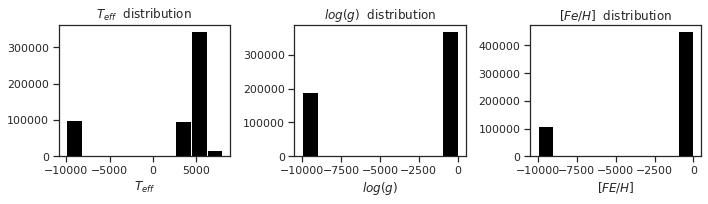

In [ ]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set(style='ticks')
fig, ax = plt.subplots(ncols=3, dpi=72, facecolor="white")
fig.set_figheight(3)
fig.set_figwidth(10)

#Teff
ax[0].title.set_text('$T_{eff}$  distribution')
ax[0].hist(dataframe['TEFF'], color='black')
ax[0].set_xlabel('$T_{eff}$')
fig.tight_layout()


#log(g)
ax[1].title.set_text('$log(g)$  distribution')
ax[1].hist(dataframe['LOGG'], color='black')
ax[1].set_xlabel('$log(g)$')
fig.tight_layout()

#log(g)
ax[2].title.set_text('$[Fe/H]$  distribution')
ax[2].hist(dataframe['FE_H'], color='black')
ax[2].set_xlabel('$[FE/H]$')
fig.tight_layout()


plt.show()

**Separate out a dataset with good labels**
- combined spectral S/N $\geq$ 200
- STARFLAG = 0
- ASPCAPFLAG = 0
- 4000K < $T_{\mathrm{eff}}$ < 5500K
- -3.0 dex < [Fe/H]
- $\log(g)$ $\neq$ -9999. (value defined by ASPCAP when no ASPCAP labels are given)
- $V_{scatter}$ < 1.0 km/s

In [ ]:
snr_min = 200.
teff_min = 4000.
teff_max = 5500.
vscatter_max = 1.
fe_h_min = -3.

In [ ]:
indices, cols = np.where((aspcapflag[:]==0.)&(starflag[:]==0.)&(combined_snr[:]>=snr_min)&(vscatter[:]<vscatter_max)&(fe_h[:]>fe_h_min)&(teff[:]>teff_min)&(teff[:]<teff_max)&(logg[:]!=-9999.).reshape(len(ap_id),1))

ap_id_high_snr = ap_id[indices]
print(str(len(ap_id_high_snr))+' individual visits from '+str(len(set(ap_id_high_snr)))+' stars remain.')

53135 individual visits from 17149 stars remain.


**Select the first **$num\_ref$** visits for the reference set**

We shuffle around the data to avoid local effects.
Later on, it will be be split into training and cross-validation sets.
The remaining high S/N spectra will be used in the test set

In [ ]:
num_ref = 44784 # number of reference spectra

indices_ref = indices[0:num_ref]
np.random.shuffle(indices_ref)

ap_id_ref = ap_id[indices_ref]
teff = teff[indices_ref]
logg = logg[indices_ref]
fe_h = fe_h[indices_ref]

print('Reference set includes '+str(len(ap_id_ref))+' individual visits from '+str(len(set(ap_id_ref)))+' stars.')

Reference set includes 44784 individual visits from 14498 stars.


**Let's check out**

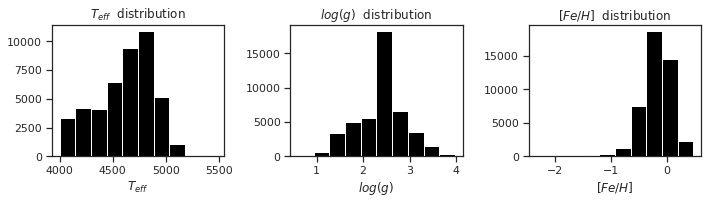

In [ ]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set(style='ticks')
fig, ax = plt.subplots(ncols=3, dpi=72, facecolor="white")
fig.set_figheight(3)
fig.set_figwidth(10)

#Teff
ax[0].title.set_text('$T_{eff}$  distribution')
ax[0].hist(teff, color='black')
ax[0].set_xlabel('$T_{eff}$')
fig.tight_layout()


#log(g)
ax[1].title.set_text('$log(g)$  distribution')
ax[1].hist(logg, color='black')
ax[1].set_xlabel('$log(g)$')
fig.tight_layout()

#log(g)
ax[2].title.set_text('$[Fe/H]$  distribution')
ax[2].hist(fe_h, color='black')
ax[2].set_xlabel('$[Fe/H]$')
fig.tight_layout()


plt.show()

**Now collect individual visit spectra, normalize each spectrum, and save data**

**Normalize spectra**
1. separate into three chips
2. divide by median value in each chip
3. recombine each spectrum into a vector of 7214 flux values

In [ ]:
# Define edges of detectors
blue_chip_begin = 322
blue_chip_end = 3242
green_chip_begin = 3648
green_chip_end = 6048   
red_chip_begin = 6412
red_chip_end = 8306 

**Here is an example**

We will take normalized spectra inside chips

(559484, 8575)


Text(0, 0.5, 'flux')

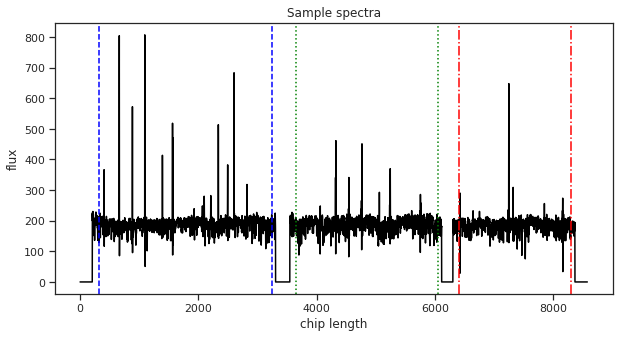

In [ ]:
print(F['spectrum'].shape)


fig = plt.figure(figsize = (10,5))
plt.title('Sample spectra')
fig = plt.plot(F['spectrum'][1],color='black')


blue_chip = [blue_chip_begin, blue_chip_end]
green_chip = [green_chip_begin, green_chip_end]
red_chip = [red_chip_begin, red_chip_end]

for xc in blue_chip:
    blue = plt.axvline(xc ,color='blue', linestyle='--')
for xc in green_chip:
    green = plt.axvline(xc ,color='green', linestyle=':')
for xc in red_chip:
    green = plt.axvline(xc ,color='red', linestyle='-.')

plt.xlabel('chip length')
plt.ylabel('flux')

In [ ]:
savename = '/content/drive/My Drive/TA/training_data.h5'

with h5py.File(datadir + savename, "w") as f:
    
    # Create datasets for your reference data file 
    spectra_ds = f.create_dataset('spectrum', (1,7214), maxshape=(None,7214), dtype="f", chunks=(1,7214))
    teff_ds = f.create_dataset('TEFF', teff.shape, dtype="f")
    logg_ds = f.create_dataset('LOGG', logg.shape, dtype="f")
    fe_h_ds = f.create_dataset('FE_H', fe_h.shape, dtype="f")
    ap_id_ds = f.create_dataset('Ap_ID', ap_id_ref.shape, dtype="S18")
    
    teff_ds[:] = teff
    logg_ds[:] = logg
    fe_h_ds[:] = fe_h
    ap_id_ds[:] = ap_id_ref.tolist()
        
    first_entry=True
    
    for i in indices_ref:

        spectrum = F['spectrum'][i:i+1]
        spectrum[np.isnan(spectrum)]=0.

        # NORMALIZE SPECTRUM
        # Separate spectra into chips
        blue_sp = spectrum[0:1,blue_chip_begin:blue_chip_end]
        green_sp = spectrum[0:1,green_chip_begin:green_chip_end]
        red_sp = spectrum[0:1,red_chip_begin:red_chip_end]

        # Normalize spectra by chips

        blue_sp = (blue_sp.T/np.median(blue_sp, axis=1)).T
        green_sp = (green_sp.T/np.median(green_sp, axis=1)).T
        red_sp = (red_sp.T/np.median(red_sp, axis=1)).T 

        # Recombine spectra

        spectrum = np.column_stack((blue_sp,green_sp,red_sp))
        if first_entry:
            spectra_ds[0] = spectrum
            first_entry=False
        else:
            spectra_ds.resize(spectra_ds.shape[0]+1, axis=0)

            spectra_ds[-1] = spectrum

print(savename+' has been saved as the reference set to be used in 4_Train_Model.ipynb')  

/content/drive/My Drive/TA/training_data.h5 has been saved as the reference set to be used in 4_Train_Model.ipynb


**Take a look at our preprocessed spectra and its parameter**

In [ ]:
S = h5py.File(savename,'r')
print('Dataset keys in file: \n')
print(list(S.keys()))

Dataset keys in file: 

['Ap_ID', 'FE_H', 'LOGG', 'TEFF', 'spectrum']


Spectrum in the file:  (44784, 7214)


Text(0, 0.5, 'flux')

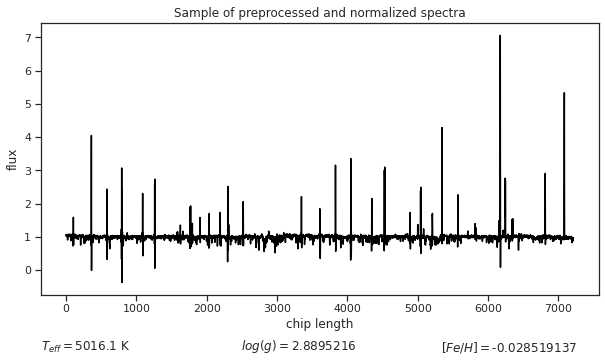

In [ ]:
print('Spectrum in the file: ', S['spectrum'].shape)

#the spectra
fig = plt.figure(figsize = (10,5))
plt.title('Sample of preprocessed and normalized spectra')
fig = plt.plot(S['spectrum'][1],color='black')
sample_teff = '$T_{eff} = $'+str(S['TEFF'][1][0])+' K'
sample_logg = '$log(g) = $'+str(S['LOGG'][1][0])
sample_fe_h = '$[Fe/H] = $'+str(S['FE_H'][1][0])

#The respective parameter
plt.annotate(sample_teff, (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.annotate(sample_logg, (0,0), (200, -60), xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.annotate(sample_fe_h, (0,0), (400, -60), xycoords='axes fraction', textcoords='offset points', va='bottom')


plt.xlabel('chip length')
plt.ylabel('flux')
